<a href="https://colab.research.google.com/github/carlos-alves-one/-Amazon-Review-NLP/blob/main/Sentiment_Analysis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Intelligence
### Module: Natural Language Processing
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003
### Coursework Project

# Data Collection

### Load the data

In [2]:
# Imports the 'drive' module from 'google.colab' and mounts the Google Drive to
# the '/content/drive' directory in the Colab environment.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Dataset source: https://www.kaggle.com/datasets/akudnaver/amazon-reviews-dataset

License: Unknown

In [3]:
# Import the pandas library and give it the alias 'pd' for data manipulation and analysis
import pandas as pd

# Load the dataset Amazon Review Details from Google Drive
data_path = '/content/drive/MyDrive/amazon_project/amazon-review-details.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head(3).T


,0,1,2
report_date,2019-01-02,2019-01-03,2019-01-03
online_store,FRESHAMAZON,FRESHAMAZON,FRESHAMAZON
upc,8718114216478,5000184201199,5000184201199
retailer_product_code,B0142CI6FC,B014DFNNRY,B014DFNNRY
brand,Dove Men+Care,Marmite,Marmite
category,Personal Care,Foods,Foods
sub_category,Deos,Savoury,Savoury
product_description,Dove Men+Care Extra Fresh Anti-perspirant Deod...,Marmite Spread Yeast Extract 500g,Marmite Spread Yeast Extract 500g
review_date,2019-01-01,2019-01-02,2019-01-02
review_rating,5,5,4


# Data Preprocessing

The dataset contains multiple columns, but for our sentiment analysis, we will primarily focus on the 'review_rating' as our target variable and the text of the reviews for our feature.

**Tasks :**

- Select relevant columns ('review_rating' and the review text column).

- Handle missing values if necessary.

- Convert ratings to a binary sentiment (positive or negative).

- Preprocess the text data (tokenization, lowercasing, removing stop words, etc.).


## Import Libraries and Packages

In [4]:
# Importing the 'stopwords' collection from the nltk.corpus module
from nltk.corpus import stopwords

# Imports the regular expression module for pattern matching in strings
import re

# Importing the 'word_tokenize' and 'sent_tokenize' functions from nltk.tokenize for tokenizing strings into words
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the nltk module, which is a suite of libraries for natural language processing
import nltk

# Downloading the 'punkt' tokenizer models, used by nltk for sentence tokenization
nltk.download('punkt')

# Downloading the 'stopwords' dataset, which contains lists of common stopwords in various languages
nltk.download('stopwords')

# Importing lemmatizer and stemmer for text normalization
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Importing WordNet, a lexical database for the English language
from nltk.corpus import wordnet

# Import Word2Vec model from gensim library
from gensim.models import Word2Vec

# Import NumPy for numerical and array operations
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Function for Cleaning & Preprocessing

In [5]:
# Declare function for data cleaning and preprocessing
def preprocess_text(text):

    # Lowercasing
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Returns a string where all elements in the list 'tokens'
    # are concatenated into a single string, separated by spaces
    return ' '.join(tokens)


## Preprocessing the Review Text

In [6]:
# Apply preprocessing to the review text
data['processed_text'] = data['review_text'].apply(preprocess_text)


## Create Column Binary Sentiment

In [7]:
# Convert ratings to binary sentiment
sentiment_mapping = {r: 1 if r > 3 else 0 for r in data['review_rating']}
data['sentiment'] = data['review_rating'].map(sentiment_mapping)


## Display Columns Preprocessed

In [8]:
# Set the display option for max column width
pd.set_option('display.max_colwidth', None)

# Display the columns relevant to check results
print(data[['review_rating', 'review_text', 'processed_text', 'sentiment']].head(3).T)


                                                                                                                                                                                                                         0  \
review_rating                                                                                                                                                                                                            5   
review_text     As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!   
processed_text                                                                                       get older know like suitable body like dove products gives fresh wide awake feeling dandruff flakey skin smelly apits   
sentiment                                                                                                       

The displayed results from the dataset reveal that the preprocessing steps effectively distilled key sentiment-related content from the original reviews, with all three examples showing high review ratings indicative of positive sentiments. The processed reviews retain critical information, focusing on aspects directly related to user experiences and satisfaction, while extraneous details are omitted. Sentiment labels consistently assigned as `1` align with the positive nature of the review ratings and the processed texts, indicating a successful preprocessing and sentiment labelling effort. This suggests that the data is well-prepared for further sentiment analysis tasks, with the preprocessing ensuring that models or analyses are based on relevant, succinct representations of the original reviews, accurately reflecting their positive sentiments.

## Extensive Data Inspection

### Check Missing Values

> Check for missing values or inconsistent data entries

In [9]:
# Checking for missing values in 'review_rating' and 'review_text' columns
missing_values = data[['review_rating', 'review_text']].isnull().sum()

# Printing results in an aligned manner
print("Missing values in selected columns:")
for column, value in missing_values.items():
    print(f"{column:15}= {value}")


Missing values in selected columns:
review_rating  = 0
review_text    = 0


The analysis confirms that the `review_rating` and `review_text` columns have no missing values, a crucial advantage for sentiment analysis. This completeness ensures the dataset is ready for sentiment analysis without needing data imputation or streamlining preprocessing like text cleaning and tokenization. It provides a solid model training and evaluation foundation, enhancing analysis reliability. The absence of missing values in these key columns simplifies project workflows and focuses on core analytical and modelling tasks.

In [10]:
# Assuming 'review_rating' should be between 1 and 5
# Checking for any ratings outside this range
invalid_ratings = data[(data['review_rating'] < 1) | (data['review_rating'] > 5)]

# Printing only the relevant columns: 'review_text' and 'review_rating'
print("Invalid ratings:\n", invalid_ratings[['review_text', 'review_rating']])


Invalid ratings:
 Empty DataFrame
Columns: [review_text, review_rating]
Index: []


The `review_rating` column analysis reveals that all ratings fall within the expected range of 1 to 5, indicating no invalid ratings in the dataset. This finding underscores the high quality of the dataset regarding rating data integrity. It eliminates the need for data cleaning steps for correcting or removing out-of-range ratings. Consequently, the dataset is well-prepared for further processing and analysis, particularly sentiment analysis, where these ratings can be directly utilized or transformed into categorical sentiment labels. This ensures a reliable foundation for the project's analytical and modelling endeavours.

### Data Distribution

> Explore data distribution, such as the number of positive vs negative reviews.

In [11]:
# Define positive (e.g., ratings 4 and 5) and negative (e.g., ratings 1 and 2) reviews
data['review_sentiment'] = data['review_rating'].apply(lambda x: 'Positive' if x > 3 else ('Negative' if x < 3 else 'Neutral'))

# Count the number of positive vs. negative reviews
sentiment_distribution = data['review_sentiment'].value_counts()

print(sentiment_distribution)


Positive    2167
Negative     227
Neutral      107
Name: review_sentiment, dtype: int64


The dataset analyzed shows a dominant number of positive reviews (2,167) compared to negative (227) and neutral (107) reviews, indicating a general customer satisfaction or potential review collection bias. Positive reviews significantly outweigh negative and neutral ones, suggesting clear sentiment trends among reviewers, with few adopting a neutral stance. This imbalance highlights the importance of considering data diversity in sentiment analysis to avoid model biases toward positive outcomes.

## Text Normalization


### Lemmatization and Stemming

- Adding lemmatization and stemming. Lemmatization converts a word to its base form with a proper dictionary meaning, whereas stemming trims words to their root form, which might not be a valid word itself.

In [12]:
# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')  # Make sure WordNet is up-to-date
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
# Initialize the Lemmatizer and Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


In [14]:
# Defines a function to map NLTK part-of-speech tags to WordNet part-of-speech tags
def nltk_tag_to_wordnet_tag(nltk_tag):

    if nltk_tag.startswith('J'):
        return wordnet.ADJ
        # If the tag starts with 'J', it's an adjective in NLTK, so return the WordNet tag for adjective

    elif nltk_tag.startswith('V'):
        return wordnet.VERB
        # If the tag starts with 'V', it's a verb, so return the WordNet tag for verb

    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
        # If the tag starts with 'N', it's a noun, so return the WordNet tag for noun

    elif nltk_tag.startswith('R'):
        return wordnet.ADV
        # If the tag starts with 'R', it's an adverb, so return the WordNet tag for adverb

    else:
        return None
        # If the NLTK tag doesn't start with J, V, N, or R, return None as it doesn't match any WordNet tag categories


In [15]:
# Defines a function to lemmatize each word in a sentence
def lemmatize_sentence(sentence):

    words = word_tokenize(sentence)
    # Tokenizes the sentence into individual words

    lemmatized_words = []
    # Initializes an empty list to store the lemmatized words

    for word, tag in nltk.pos_tag(words):
        # Loops through each word and its part-of-speech tag

        wordnet_tag = nltk_tag_to_wordnet_tag(tag)
        # Converts the POS tag into a WordNet POS tag

        if wordnet_tag is None:
            # If there's no corresponding WordNet tag, keep the word as is
            lemmatized_words.append(word)
        else:
            # If there is a corresponding WordNet tag, lemmatize the word
            lemmatized_words.append(lemmatizer.lemmatize(word, wordnet_tag))

    return ' '.join(lemmatized_words)
    # Joins the list of lemmatized words into a single string and returns it


In [16]:
# Defines a function to stem each word in a sentence
def stem_sentence(sentence):

    words = word_tokenize(sentence)
    # Tokenizes the sentence into individual words

    stemmed_words = [stemmer.stem(word) for word in words]
    # Uses a list comprehension to apply the stemmer to each word in the list of words

    return ' '.join(stemmed_words)
    # Joins the list of stemmed words into a single string and returns it


In [17]:
# Apply Lemmatization and Stemming to the review_text column
data['lemmatized_review'] = data['review_text'].apply(lemmatize_sentence)
data['stemmed_review'] = data['review_text'].apply(stem_sentence)

# Display the first few rows to verify
print(data[['review_text', 'lemmatized_review', 'stemmed_review']].head())


                                                                                                                                                                                                  review_text  \
0  As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!   
1                             Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.   
2                                                                                                                                                                                                   Excellent   
3                                                                                                                                                                  A

The results demonstrate the application of lemmatization and stemming on review texts, highlighting key differences. Lemmatization retains words in a form closer to their lexicographic roots, ensuring grammatical correctness and preserving the original meaning. Stemming simplifies words more aggressively to their stem forms, often leading to non-words, but helps consolidate word variations. Lemmatization is preferable for tasks requiring semantic accuracy and grammatical integrity while stemming is beneficial for search and indexing applications where speed and matching word variations are prioritized. Both techniques reduce the complexity of natural language data, aiding in text analysis by decreasing the number of unique words.

### Handling Negations

Sometimes, negations (like "not bad") can be crucial for sentiment analysis. Define a strategy to handle such cases.

In [18]:
# Define a function to handle negations
def handle_negations(text):

    # Pattern to identify negations followed by an alphanumeric word
    negation_pattern = re.compile(r'\b(not|no|never|n\'t)\s([a-zA-Z]+)')

    # Replace the identified pattern with the combined form (e.g., "not_good")
    modified_text = negation_pattern.sub(lambda x: x.group(1) + '_' + x.group(2), text)

    return modified_text


In [19]:
# Apply the function to the 'review_text' column
data['handled_negations'] = data['review_text'].apply(handle_negations)

# Display the first few rows to verify the changes
print(data[['review_text', 'handled_negations']].head())


                                                                                                                                                                                                  review_text  \
0  As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!   
1                             Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.   
2                                                                                                                                                                                                   Excellent   
3                                                                                                                                                                  A

The function for handling negations within the dataset's `review_text` column successfully identifies and processes negations by merging them with the following word (e.g., "no dandruff" becomes "no_dandruff"). This method is selectively applied, altering the text only where negations are present and leaving other parts of the review unchanged. Such targeted modification is crucial for sentiment analysis, as it preserves the original sentiment's context, particularly in cases where negations can significantly alter the sentiment conveyed. This preprocessing step enhances the dataset's readiness for sentiment analysis by ensuring that negations' nuanced effects are accurately represented, thereby improving the analysis's overall accuracy and reliability.

## Text Vectorization

Converting text data into a format suitable for machine learning models. Common approaches are TF-IDF (Term Frequency-Inverse Document Frequency) using word embeddings from models like Word2Vec and BERT (🤗 Transformers).

### TF-IDF Vectorization


In [20]:
# Import TF-IDF Vectorizer from scikit-learn for text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the 'processed_text' column from the DataFrame to a variable for processing
texts = data['processed_text']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform the texts into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(texts)
# tfidf_vectors is a sparse matrix with TF-IDF values. It can be used for machine learning models


### BERT (🤗 Transformers) Embedding

**BERT (requires a GPU for faster results)**

In [21]:
# Import BERT tokenizer and model from the Hugging Face Transformers library for NLP tasks
from transformers import BertTokenizer, BertModel

# Import PyTorch, a deep learning library used for working with BERT and other transformers models
import torch

# Defines a function to get BERT embeddings for a given text
def get_bert_embeddings(text, tokenizer, model):

    # Disables gradient calculations to save memory and computations
    with torch.no_grad():

        # Tokenizes the text, adding padding and truncation, and converts to PyTorch tensors
        inputs = tokenizer(text, padding=True, truncation=True, return_tensors='pt')

        # Feeds the tokenized inputs into the BERT model to get the output
        outputs = model(**inputs)

        # Averages the last hidden state across all tokens and removes extra dimensions
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # Returns the computed embeddings
    return embeddings

# Initialize BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_embeddings = data['processed_text'].apply(get_bert_embeddings, args=(bert_tokenizer, bert_model))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### Train Word2Vec model

In [22]:
# Define a function to convert text into a vector using a Word2Vec model
def vectorize_with_word2vec(text, model):

    # Split the text into individual words (tokens)
    tokens = text.split()

    # For each token in the text, get its vector from the model if it exists in the model's vocabulary
    vectors = [model.wv[t] for t in tokens if t in model.wv]

    # Return the mean of all word vectors if there are any, otherwise return a zero vector of the model's vector size
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Train a Word2Vec model (or load a pre-trained one)
word2vec_model = Word2Vec(data['processed_text'], vector_size=100, window=5, min_count=1)
word2vec_vectors = data['processed_text'].apply(vectorize_with_word2vec, args=(word2vec_model,))


# Models Building and Evaluation

## TF-IDF Vectorization

### Import Scikit-Learn Libraries

In [23]:
# Import the TfidfVectorizer class for converting a collection of raw documents into a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train_test_split function for splitting a dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Import the LogisticRegression class for performing logistic regression
from sklearn.linear_model import LogisticRegression

# Import the SVC (Support Vector Classifier) class for performing support vector machine classification
from sklearn.svm import SVC

# Import accuracy_score, f1_score, and confusion_matrix for evaluating the model's performance
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


### Slipt the Data and use Logistic Regression

In [24]:
# Use train_test_split to divide the data into training and testing sets, specifying the size of the test set and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, data['sentiment'], test_size=0.2, random_state=42)

# Initialize the LogisticRegression model
model = LogisticRegression()


### Train the Model and store prediction

In [25]:
# Train the model using the training data.
model.fit(X_train, y_train)

# Predict the sentiment for the test data.
y_pred = model.predict(X_test)


### Evaluate the Model

In [26]:
# Calculate the accuracy of the model predictions.
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score of the model predictions.
f1 = f1_score(y_test, y_pred)

# Generate the confusion matrix for the model predictions.
cm = confusion_matrix(y_test, y_pred)


### Print the Evaluation Metrics

In [27]:
# Print the accuracy of the model
print("\nAccuracy:", accuracy)

# Print the F1 score of the model
print("\nF1-Score:", f1)

# Print the confusion matrix of the model predictions
print("\nConfusion Matrix:\n", cm)



Accuracy: 0.8822355289421158

F1-Score: 0.9363538295577131

Confusion Matrix:
 [[  8  59]
 [  0 434]]


## BERT (🤗 Transformers) Embedding

### Import Scikit-Learn Libraries

In [28]:
# Import the PyTorch library for deep learning
import torch

# Import BERT tokenizer and model from the transformers library
from transformers import BertTokenizer, BertModel

# Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Import the NumPy library for numerical operations
import numpy as np


### Slipt the Data and use Logistic Regression

In [29]:
# Convert each BERT embedding to a NumPy array to ensure consistent data type and shape
bert_embeddings_np = [np.array(embedding) for embedding in bert_embeddings]

# Calculate the length of each embedding to check for consistency
embedding_lengths = [len(embedding) for embedding in bert_embeddings_np]

# Check if all embeddings have the same length, ensuring data uniformity
if len(set(embedding_lengths)) == 1:

    # Stack embeddings vertically to create a 2D array suitable for model input
    X = np.vstack(bert_embeddings_np)

else:
    # Raise an error if embeddings are of different lengths, indicating inconsistency
    raise ValueError("Not all embeddings are of the same length.")

y = data['sentiment']  # Extract sentiment labels from the dataset

# Split the dataset into training and testing sets with a test size of 20% and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with an increased number of iterations for convergence
model = LogisticRegression(max_iter=1000)


### Train the Model and store prediction

In [30]:
# Train the model using the training data
model.fit(X_train, y_train)

# Use the trained model to predict sentiment labels for the test set
y_pred = model.predict(X_test)


### Evaluate the Model

In [31]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
# Calculate the F1 score with a weighted average to account for label imbalance
f1 = f1_score(y_test, y_pred, average='weighted')
# Generate a confusion matrix to evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)


### Print the Evaluation Metrics

In [32]:
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9261477045908184
F1-Score: 0.9201575943646121
Confusion Matrix:
 [[ 38  29]
 [  8 426]]


## Text Vectorization

### Import Scikit-Learn Libraries

In [33]:
# Imports the TF-IDF Vectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Imports function to split datasets into training and testing sets
from sklearn.model_selection import train_test_split


### Slipt the Data and use Logistic Regression

In [34]:
# Extracts the column of preprocessed texts from the DataFrame
texts = data['processed_text']

# Extracts the sentiment labels column from the DataFrame
labels = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, labels, test_size=0.2, random_state=42)  # Splits the dataset

# Initialize the Logistic Regression model
lr_model = LogisticRegression()  # Creates an instance of the Logistic Regression model


### Train the Model and store prediction

In [35]:
# Train the model with the training data
lr_model.fit(X_train, y_train)  # Fits the model to the training data

# Predict the sentiment labels for the testing data
y_pred = lr_model.predict(X_test)  # Predicts sentiment labels for the test set


### Evaluate the Model

In [36]:
# Calculates the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculates the F1 score with a weighted average
f1 = f1_score(y_test, y_pred, average='weighted')

# Generates the confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred)


### Print the Evaluation Metrics

In [37]:
# Prints the accuracy of the model
print(f"Accuracy: {accuracy}")

# Prints the F1 score of the model
print(f"F1 Score: {f1}")

 # Indicates the next line will print the confusion matrix
print("Confusion Matrix:")

# Prints the confusion matrix
print(conf_matrix)


Accuracy: 0.8822355289421158
F1 Score: 0.8396624657911793
Confusion Matrix:
[[  8  59]
 [  0 434]]


# Advanced Text Preprocessing and Feature Engineering



## Custom Stopword Removal

In [38]:
# Define function Removes custom stopwords from a given text
def remove_custom_stopwords(text, custom_stopwords):

    # Tokenize the input text into individual words
    tokens = word_tokenize(text)

    # Create a list of tokens that are not in the custom stopwords list, case-insensitively
    filtered_tokens = [word for word in tokens if word.lower() not in custom_stopwords]

    # Join the filtered tokens back into a string and return it
    return ' '.join(filtered_tokens)

# Define a list of additional stopwords based on domain knowledge or frequent but less informative words
custom_stopwords = ['amazon', 'product', 'really', 'like', 'would', 'buy']

# Apply the custom stopword removal function to each review in the dataset, updating the 'processed_reviews' column
data['processed_reviews'] = data['review_text'].apply(lambda x: remove_custom_stopwords(x, custom_stopwords))


## Synonym Handling

In [39]:
# Define a function Replaces words with their most common synonym to reduce feature space
def replace_synonyms(text):

    # Tokenize the input text into individual words
    tokens = word_tokenize(text)

    # Initialize an empty list to hold the new tokens after synonym replacement
    new_tokens = []

    for word in tokens:

        # Retrieve a set of synonyms for the current word
        synonyms = wordnet.synsets(word)

        if synonyms:
          # Select the first synonym's first lemma (most common synonym) if synonyms are available
          most_common_synonym = synonyms[0].lemmas()[0].name()

          # Add the most common synonym to the new tokens list
          new_tokens.append(most_common_synonym)

        else:

          # If no synonyms are found, add the original word to the new tokens list
          new_tokens.append(word)

    # Join the new tokens back into a string and return it
    return ' '.join(new_tokens)

# Apply the synonym replacement function to each review in the dataset, updating the 'processed_reviews' column
data['processed_reviews'] = data['review_text'].apply(replace_synonyms)


## N-Grams

In [40]:
# Import CountVectorizer for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with n-gram range to include both unigrams and bigrams for richer text representation
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Transform the processed reviews into a sparse matrix of token counts, capturing both unigram and bigram frequencies
X = vectorizer.fit_transform(data['processed_reviews'])


## Feature Scaling

In [41]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler to scale features to zero mean and unit variance
scaler = StandardScaler(with_mean=False)

# Apply the scaler to the TF-IDF vectors, standardizing them to have zero mean and unit variance
tfidf_scaled = scaler.fit_transform(tfidf_vectors)


# Models Building and Evaluation

In [42]:
# Import train_test_split to divide data into training and testing sets
from sklearn.model_selection import train_test_split

# Import LogisticRegression for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Import SVC for Support Vector Machine classification
from sklearn.svm import SVC

# Import RandomForestClassifier for random forest modeling
from sklearn.ensemble import RandomForestClassifier

# Import metrics for model evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Split the standardized TF-IDF vectors and sentiment labels into training and testing sets with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(tfidf_scaled, data['sentiment'], test_size=0.2, random_state=42)

# Initialize a list of tuples where each tuple contains a model name and its corresponding initialized object
models = [

    # Logistic regression model
    ('Logistic Regression', LogisticRegression()),

    # Linear Support Vector Machine model
    ('Support Vector Machine', SVC(kernel='linear')),

    # Random Forest model
    ('Random Forest', RandomForestClassifier())
]

# Loop through each model to train and evaluate them on the test data
for name, model in models:

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict sentiment labels for the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the F1 score of the model
    f1 = f1_score(y_test, y_pred)

    # Print the model's name along with its accuracy and F1 score for evaluation
    print(f"{name}: Accuracy = {accuracy:.2f}, F1-score = {f1:.2f}")

    # Print the confusion matrix to understand the model's performance in detail
    print(confusion_matrix(y_test, y_pred))


Logistic Regression: Accuracy = 0.92, F1-score = 0.95
[[ 30  37]
 [  5 429]]
Support Vector Machine: Accuracy = 0.91, F1-score = 0.95
[[ 32  35]
 [  8 426]]
Random Forest: Accuracy = 0.92, F1-score = 0.96
[[ 29  38]
 [  0 434]]


## ROC Curve and AUC metrics

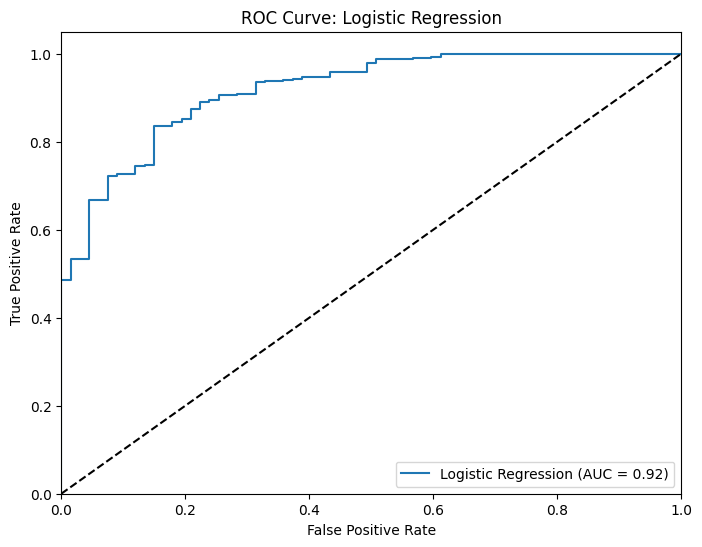

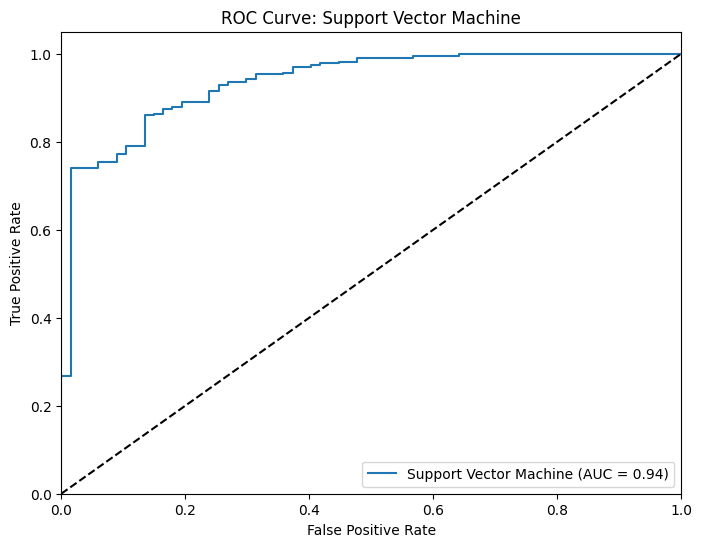

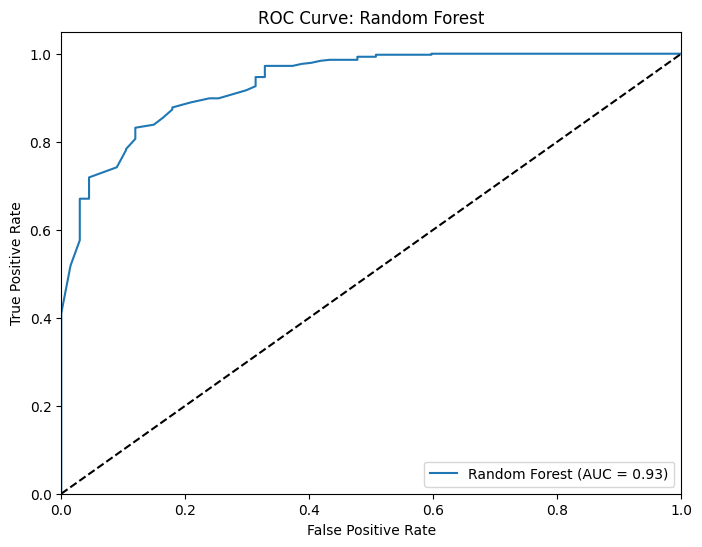

In [50]:
# Import matplotlib's pyplot for plotting graphs
import matplotlib.pyplot as plt

# Import ROC curve and AUC metrics from scikit-learn
from sklearn.metrics import roc_curve, auc

# Import LogisticRegression for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Import Support Vector Machine classifier from scikit-learn
from sklearn.svm import SVC

# Import Random Forest classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Define a list of tuples where each tuple contains a model name and its corresponding initialized object
models = [

    # Logistic regression model
    ('Logistic Regression', LogisticRegression()),

    # Linear Support Vector Machine model
    ('Support Vector Machine', SVC(probability=True)),

    # Random Forest model
    ('Random Forest', RandomForestClassifier())
]

# Loop through each model tuple
for name, model in models:

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the probabilities for the positive class for binary classification
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute the ROC curve using the true labels and predicted probabilities
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Compute the Area Under the ROC Curve (AUC) score
    roc_auc = auc(fpr, tpr)

    # Create a new figure with a specified size
    plt.figure(figsize=(8, 6))

    # Plot the ROC curve and include the AUC score in the label
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot the random classifier line for reference
    plt.plot([0, 1], [0, 1], 'k--')

    # Set the x-axis limits from 0 to 1
    plt.xlim([0.0, 1.0])

    # Set the y-axis limits from 0 to 1.05
    plt.ylim([0.0, 1.05])

    # Set the x-axis label
    plt.xlabel('False Positive Rate')

    # Set the y-axis label
    plt.ylabel('True Positive Rate')

    # Set the plot title with the model name
    plt.title(f'ROC Curve: {name}')

    # Add a legend to the plot in the lower right corner
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

    # Print a newline for a line break between each ROC curve visualization
    print("\n")
